In [1]:
import tensorflow as tf
import numpy as np
import shap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#pobieranie danych
iris = load_iris()
X,y = iris.data, iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#tworzenie modelu
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_shape=(4,)),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50,verbose=0)

explainer = shap.DeepExplainer(model,X_train)

shap_values = explainer.shap_values(X_test)



Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


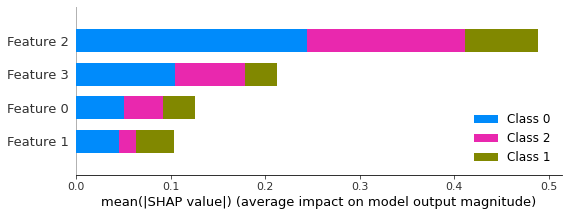

In [2]:
shap.summary_plot(shap_values,X_test)